# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from matplotlib.lines import Line2D

from mpl_toolkits import mplot3d

from scipy.stats import t

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02a_visualization/'

# Loading data

## Train data (*smoothed & scaled*)

In [4]:
path_to_ftir_data = './../data/preprocessed_data/ftir_scaled_train.csv'

In [5]:
data = pd.read_csv(path_to_ftir_data, index_col=0)

print(data.shape)
data.head(3)

(26, 1142)


0            1            2            3            4  \
wavenumber  1900.766600  1899.802230  1898.837870  1897.873500  1896.909130   
1              0.000494     0.000944     0.001362     0.001750     0.002112   
2              0.000210     0.000215     0.000213     0.000205     0.000192   

                      5            6            7            8            9  \
wavenumber  1895.944770  1894.980400  1894.016030  1893.051670  1892.087300   
1              0.002451     0.002770     0.003074     0.003364     0.003646   
2              0.000175     0.000155     0.000132     0.000109     0.000085   

                     10           11           12           13           14  \
wavenumber  1891.122930  1890.158570  1889.194200  1888.229830  1887.265470   
1              0.003921     0.004193     0.004467     0.004744     0.005028   
2              0.000063     0.000042     0.000025     0.000011     0.000003   

                     15           16           17           18          19  \
wavenumber  1886.301100  1885.336730  1884.372370  1883.408000  1882.44364   
1              0.005324     0.005633     0.005960     0.006308     0.00668   
2              0.000000     0.000004     0.000017     0.000039     0.00007   

                     20           21           22           23           24  \
wavenumber  1881.479270  1880.514900  1879.550540  1878.586170  1877.621800   
1              0.007079     0.007509     0.007974     0.008476     0.009019   
2              0.000113     0.000168     0.000236     0.000318     0.000415   

            ...        1117        1118        1119        1120        1121  \
wavenumber  ...  823.569090  822.604720  821.640360  820.675990  819.711620   
1           ...    0.037121    0.035323    0.033560    0.031835    0.030152   
2           ...    0.072690    0.071565    0.070364    0.069083    0.067721   

                  1122        1123        1124        1125        1126  \
wavenumber  818.747260  817.782890  816.818520  815.854160  814.889790   
1             0.028514    0.026926    0.025390    0.023910    0.022491   
2             0.066275    0.064743    0.063123    0.061413    0.059610   

                  1127        1128        1129        1130        1131  \
wavenumber  813.925420  812.961060  811.996690  811.032320  810.067960   
1             0.021135    0.019846    0.018627    0.017483    0.016417   
2             0.057713    0.055719    0.053626    0.051432    0.049135   

                  1132        1133        1134        1135        1136  \
wavenumber  809.103590  808.139230  807.174860  806.210490  805.246130   
1             0.015433    0.014533    0.013723    0.013004    0.012382   
2             0.046732    0.044221    0.041600    0.038868    0.036021   

                  1137        1138        1139        1140        1141  
wavenumber  804.281760  803.317390  802.353030  801.388660  800.424290  
1             0.011859    0.011440    0.011127    0.010924    0.010836  
2             0.033058    0.029976    0.026773    0.023447    0.019997  

[3 rows x 1142 columns]

## Samples description

In [6]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


Description  Type  Class  Label
1                    MFGO, разб. 1:20  $GO$      1  Train
2           HGO, 0.0116 г в 25 мл H2O  $GO$      1  Train
3  GO, RusGraphene, 2 г в 1000 мл H2O  $GO$      1  Train

# Data visualization

## Selecting *train* part of sample `samples_description` 

In [8]:
type_color_dict = {
    '$GO$': 'RoyalBlue',
    '$rGO$': 'Goldenrod',
    '$GO_{d}$': 'SeaGreen'
}

type_dict = {
    '$rGO$': '$вОГ$',
    '$GO$': '$ОГ$',
    '$GO_{d}$': '$ОГ_{диализ}$'
}

In [9]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


Description  Type  Class  Label
1                    MFGO, разб. 1:20  $GO$      1  Train
2           HGO, 0.0116 г в 25 мл H2O  $GO$      1  Train
3  GO, RusGraphene, 2 г в 1000 мл H2O  $GO$      1  Train

## Smoothed and scaled spectra for each class (*3D-plot*)

In [10]:
wavenumber = data.loc['wavenumber']

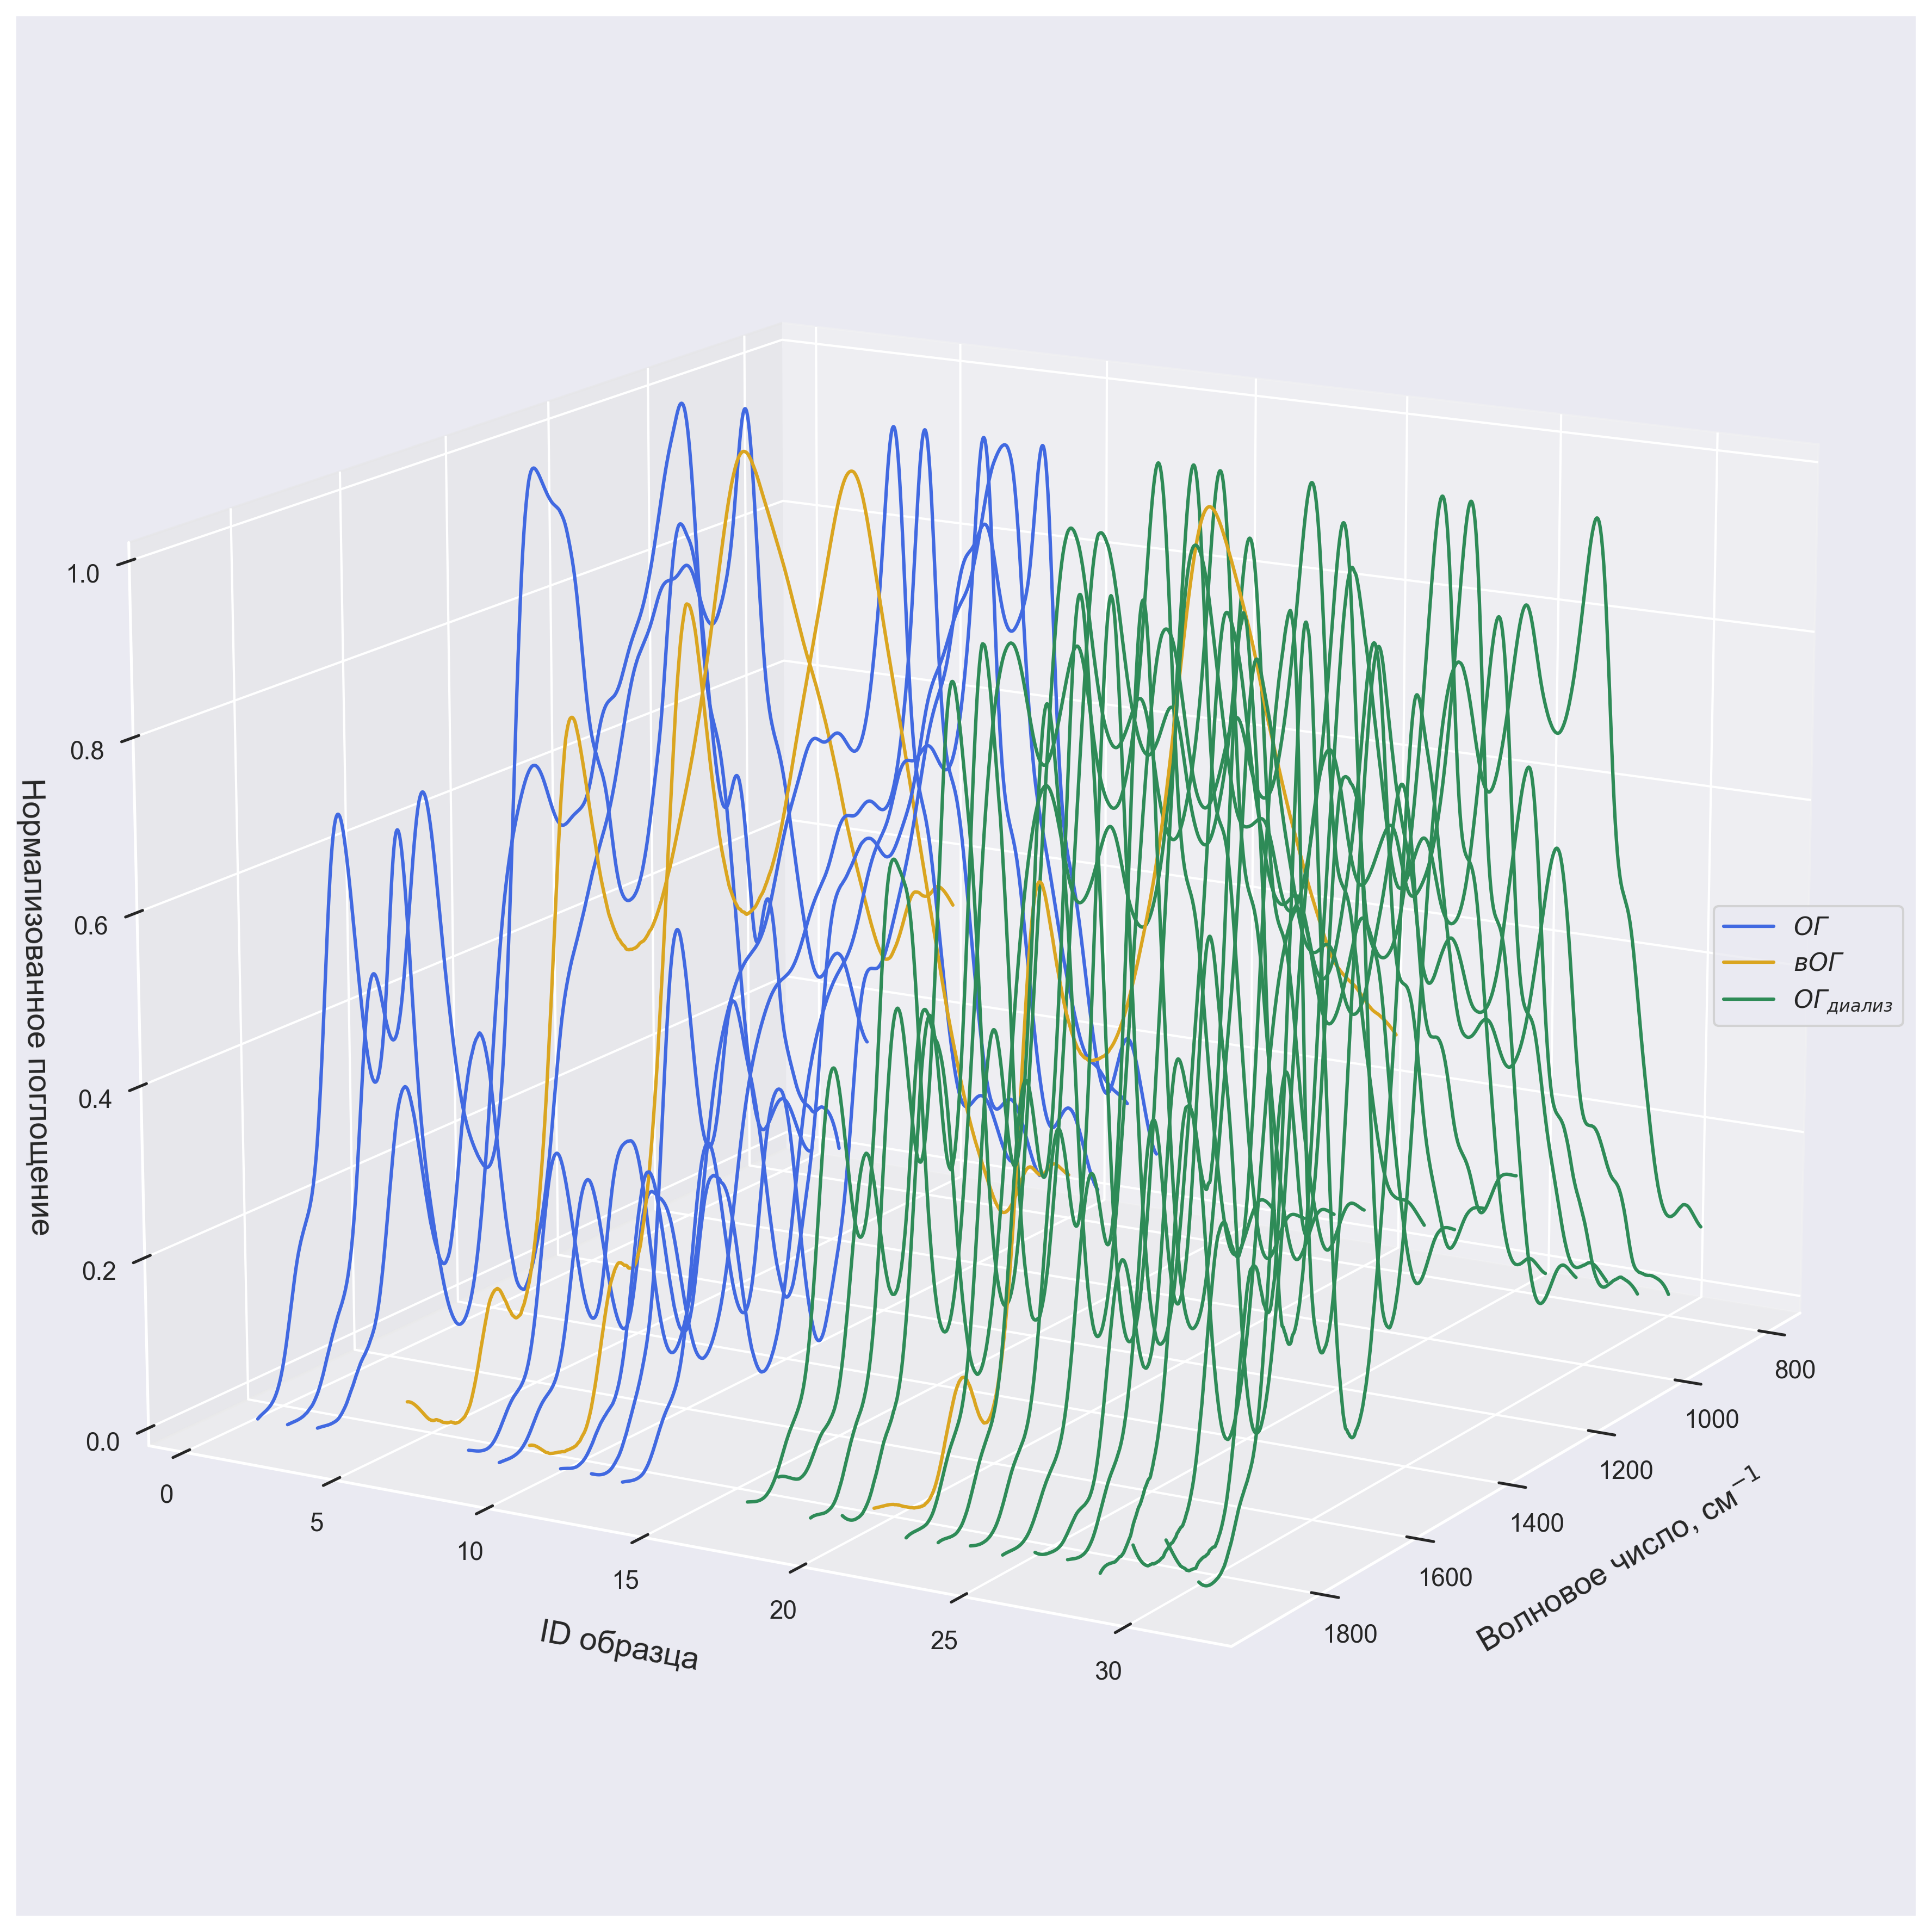

In [11]:
fontsize = 14

sns.set_theme()

fig = plt.figure(figsize=(12, 12), dpi=300)
ax = plt.axes(projection='3d')

for index in data.index[1:]:
    type_ = samples_description.loc[index]['Type']
    type = type_dict[type_]
    color = type_color_dict[type_]

    x = wavenumber
    y = [int(index)] * data.shape[1]
    z = data.loc[index]
    
    ax.plot(x, y, z, color=color, linewidth=1.5, label=type)

ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=15)
ax.set_ylabel('ID образца', fontstyle='normal', fontsize=fontsize, labelpad=15)
ax.set_zlabel('Нормализованное поглощение', fontstyle='normal', fontsize=fontsize, labelpad=5, rotation=90)

# only unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='center right')

plt.tight_layout()

ax.view_init(elev=15, azim=30, roll=0)

plt.savefig(f'{path_to_save}/3d_spectra_visualization.png', dpi=600)

plt.show()

## Principal spectra of 3 *GO* types

In [12]:
x = data.loc['wavenumber']

go_spectrum = data.loc['8']
rgo_spectrum = data.loc['10']
god_spectrum = data.loc['22']

### 2D-visualization

In [13]:
bands_highlighting = True
delta = 55

text_fontsize = 12
coef_top = 0.98
coef = 0.01

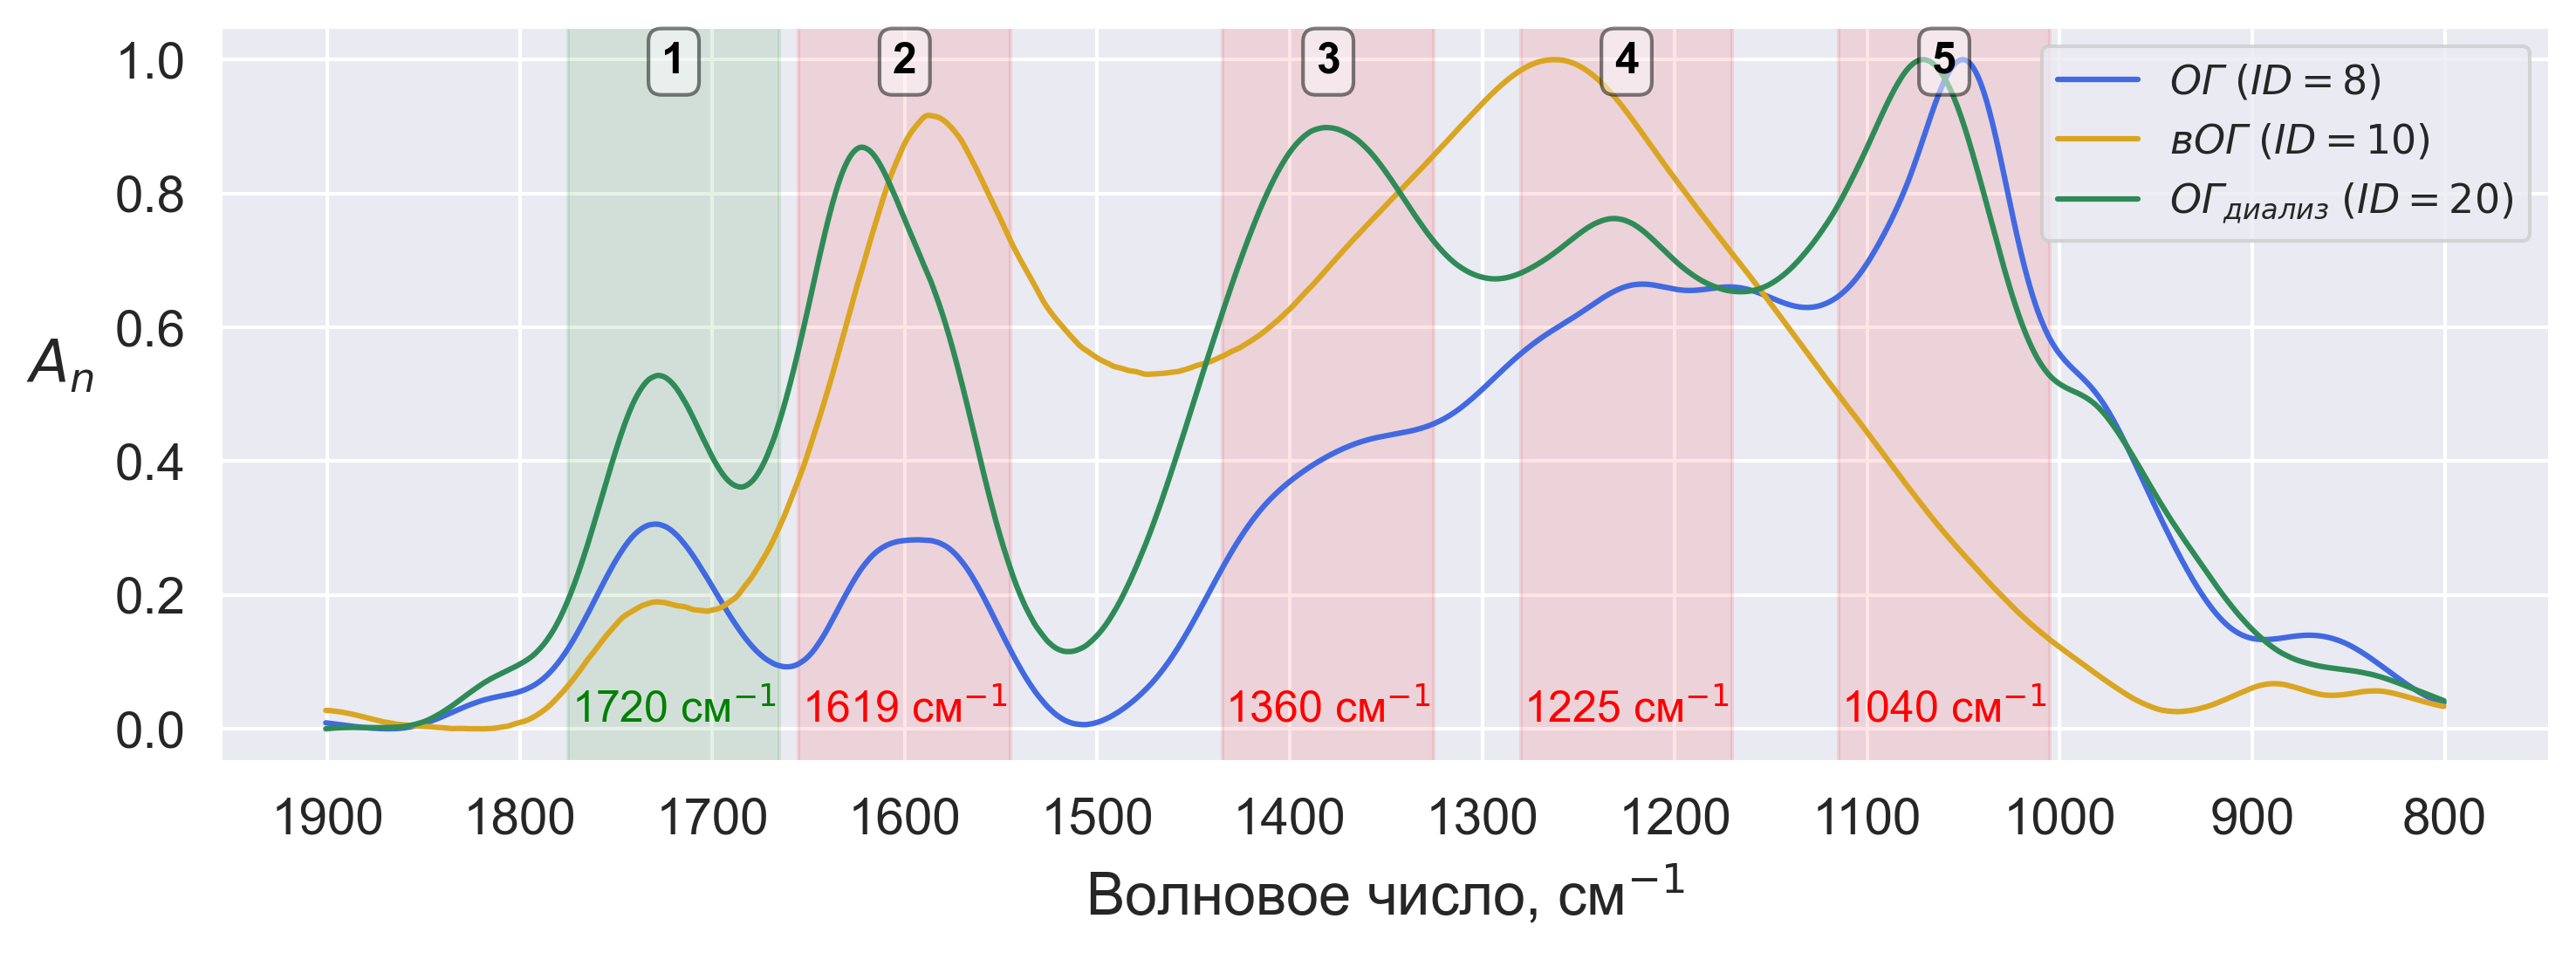

In [14]:
fontsize = 16

sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 3.8), dpi=300)

ax.plot(x, go_spectrum, color='RoyalBlue', label='$ОГ$ $(ID = 8)$')
ax.plot(x, rgo_spectrum, color='Goldenrod', label='$вОГ$ $(ID = 10)$')
ax.plot(x, god_spectrum, color='SeaGreen', label='$ОГ_{диализ}$ $(ID = 20)$')

ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
ax.set_ylabel('$A_{n}$', fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2)

ax.invert_xaxis()

if bands_highlighting:
    # Band №1 (1720)
    band = 1720
    ax.axvspan(band-delta, band+delta, color='green', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1720 см$^{-1}$', fontsize=text_fontsize, color='green', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '1', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №2 (1619)
    band = 1600
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1619 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '2', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №3 (1360)
    band = 1380
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1360 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '3', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №4 (1225)
    band = 1225
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1225 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '4', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №5 (1040)
    band = 1060
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1040 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '5', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()

plt.savefig(f'{path_to_save}/lineplot_princripal_spectra.png', dpi=600)

plt.show()

### Same visualization for *graphical abstract*

In [15]:
path_to_graphical_abstract = './../../../../smth_else/graphical_abstract'

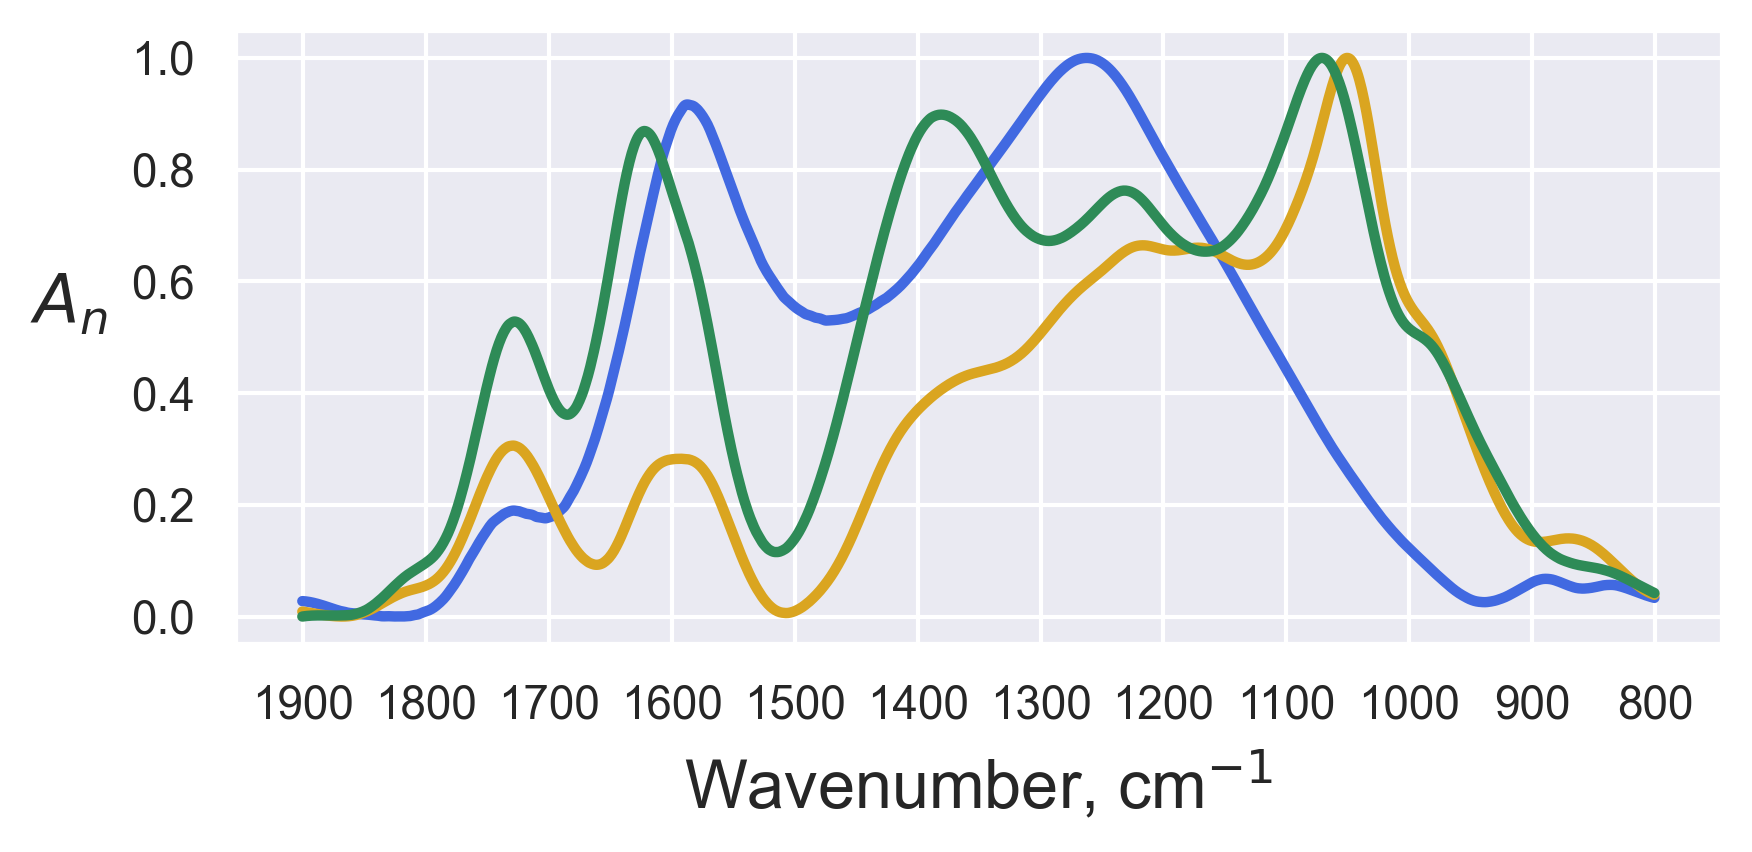

In [16]:
fontsize = 16
linewidth = 2.5

sns.set_theme()

fig = plt.figure(figsize=(6, 3), dpi=300)
ax = fig.gca()

ax.plot(x, rgo_spectrum, color='RoyalBlue', linewidth=linewidth, label='$rGO$ $(id = 10)$')
ax.plot(x, go_spectrum, color='Goldenrod', linewidth=linewidth, label='$GO$ $(id = 9)$')
ax.plot(x, god_spectrum, color='SeaGreen', linewidth=linewidth, label='$GO_{d}$ $(id = 23)$')

ax.set_xlabel('Wavenumber, cm$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
ax.set_ylabel('$A_{n}$', fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

# ax.legend(loc='best')

plt.tight_layout()

plt.savefig(f'{path_to_graphical_abstract}/2d_princripal_spectra.png', dpi=600)

plt.show()

## Spectra of all samples for each class (3 subplots)

In [17]:
fontsize = 16

wavenumber = data.loc['wavenumber']
unique_types = samples_description['Type'].unique()

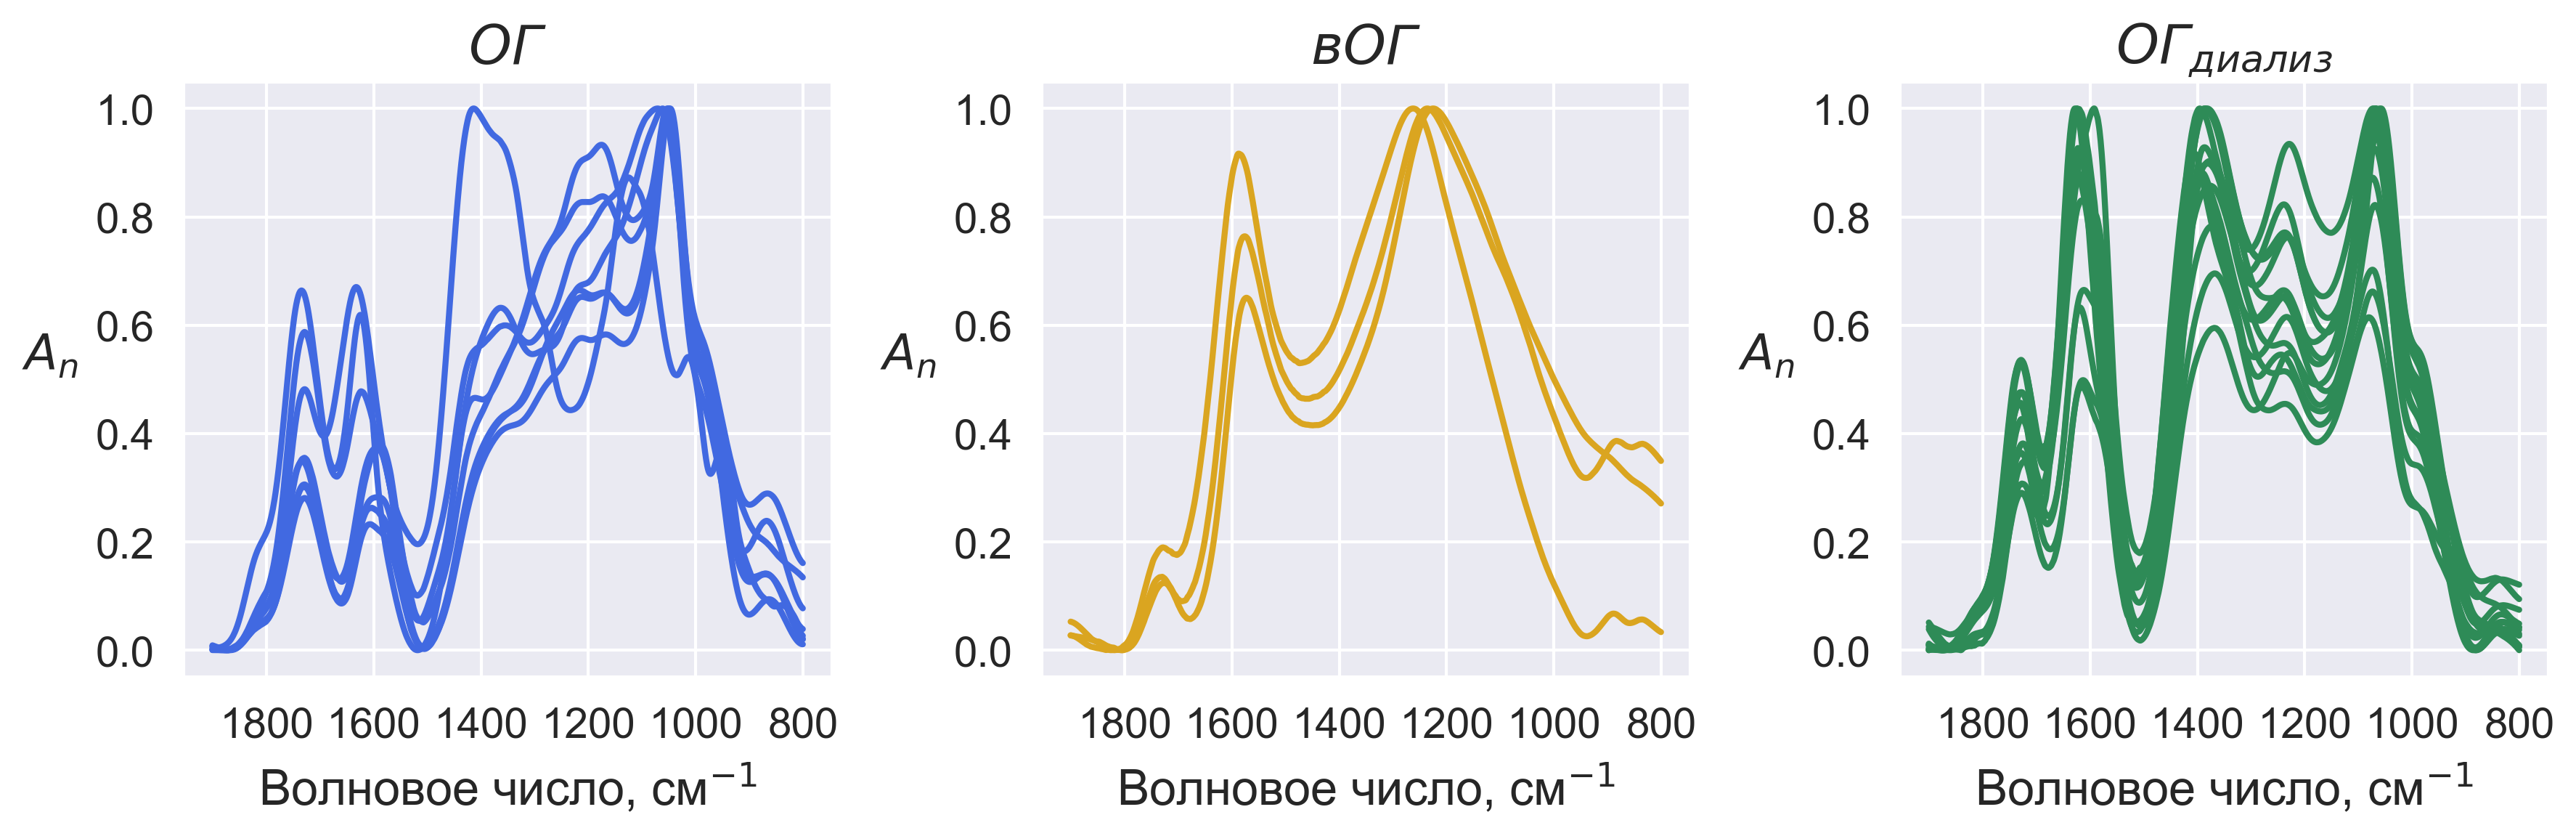

In [18]:
sns.set_theme()

nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4), dpi=300)

for ax, (type, color) in zip(axes, zip(unique_types, [type_color_dict[t] for t in unique_types])):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    data_type = data.loc[type_indexes]

    for i in type_indexes:
        spectrum = data_type.loc[i]
        ax.plot(
            wavenumber,
            spectrum,
            color=color,
            linewidth=2.0,
            label=type
        )

    ax.set_title(type_dict[type], fontstyle='normal', fontsize=fontsize+2, fontweight='bold') 
    
    ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)  # Wavenumber, cm$^{-1}$, Волновое число, см$^{-1}$
    ax.set_ylabel('$A_{n}$', fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2)

    ax.invert_xaxis()

plt.tight_layout()

plt.savefig(f'{path_to_save}/spectra_by_type_3_subplots.png', dpi=600)

plt.show()

## Heat Map visualization

### Data wrangling

In [19]:
# heatmap data processing
heatmap_data = data.copy().loc['1':]
heatmap_data.columns = [round(wave) for wave in data.loc['wavenumber'].tolist()]
heatmap_data = heatmap_data.loc[:, 1900:]

# sorting indexes by sample type (GO, rGO, GOd)
indexes = []
unique_types = ['$GO$', '$rGO$', '$GO_{d}$']
for type in unique_types:
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    indexes.extend(type_indexes)

# reindexing heatmap dataframe
heatmap_data = heatmap_data.reindex(indexes)
heatmap_data.head(3)

1900      1899      1898      1897      1896      1895      1894  \
1  0.000944  0.001362  0.001750  0.002112  0.002451  0.002770  0.003074   
2  0.000215  0.000213  0.000205  0.000192  0.000175  0.000155  0.000132   
3  0.002476  0.002405  0.002323  0.002230  0.002128  0.002017  0.001899   

       1893      1892      1891      1890      1889      1888      1887  \
1  0.003364  0.003646  0.003921  0.004193  0.004467  0.004744  0.005028   
2  0.000109  0.000085  0.000063  0.000042  0.000025  0.000011  0.000003   
3  0.001776  0.001648  0.001517  0.001383  0.001250  0.001116  0.000985   

       1886      1885      1884      1883      1882      1881      1881  \
1  0.005324  0.005633  0.005960  0.006308  0.006680  0.007079  0.007509   
2  0.000000  0.000004  0.000017  0.000039  0.000070  0.000113  0.000168   
3  0.000856  0.000732  0.000613  0.000501  0.000397  0.000303  0.000218   

       1880      1879      1878      1877  ...      824       823       822   \
1  0.007974  0.008476  0.009019  0.009606  ...  0.037121  0.035323  0.033560   
2  0.000236  0.000318  0.000415  0.000529  ...  0.072690  0.071565  0.070364   
3  0.000146  0.000087  0.000042  0.000013  ...  0.208237  0.205610  0.203011   

       821       820       819       818       817       816       815   \
1  0.031835  0.030152  0.028514  0.026926  0.025390  0.023910  0.022491   
2  0.069083  0.067721  0.066275  0.064743  0.063123  0.061413  0.059610   
3  0.200442  0.197910  0.195416  0.192967  0.190564  0.188213  0.185918   

       814       813       812       811       810       809       808   \
1  0.021135  0.019846  0.018627  0.017483  0.016417  0.015433  0.014533   
2  0.057713  0.055719  0.053626  0.051432  0.049135  0.046732  0.044221   
3  0.183681  0.181509  0.179403  0.177369  0.175410  0.173531  0.171735   

       807       806       805       804       803       802       801   \
1  0.013723  0.013004  0.012382  0.011859  0.011440  0.011127  0.010924   
2  0.041600  0.038868  0.036021  0.033058  0.029976  0.026773  0.023447   
3  0.170026  0.168408  0.166886  0.165463  0.164143  0.162931  0.161829   

       800   
1  0.010836  
2  0.019997  
3  0.160843  

[3 rows x 1141 columns]

### Heat Map of all spectra for each class (3 subplots)

In [20]:
fontsize = 14

type_cmap = {
    '$GO$': 'Blues',
    '$rGO$': 'YlOrBr',
    '$GO_{d}$': 'Greens'
}

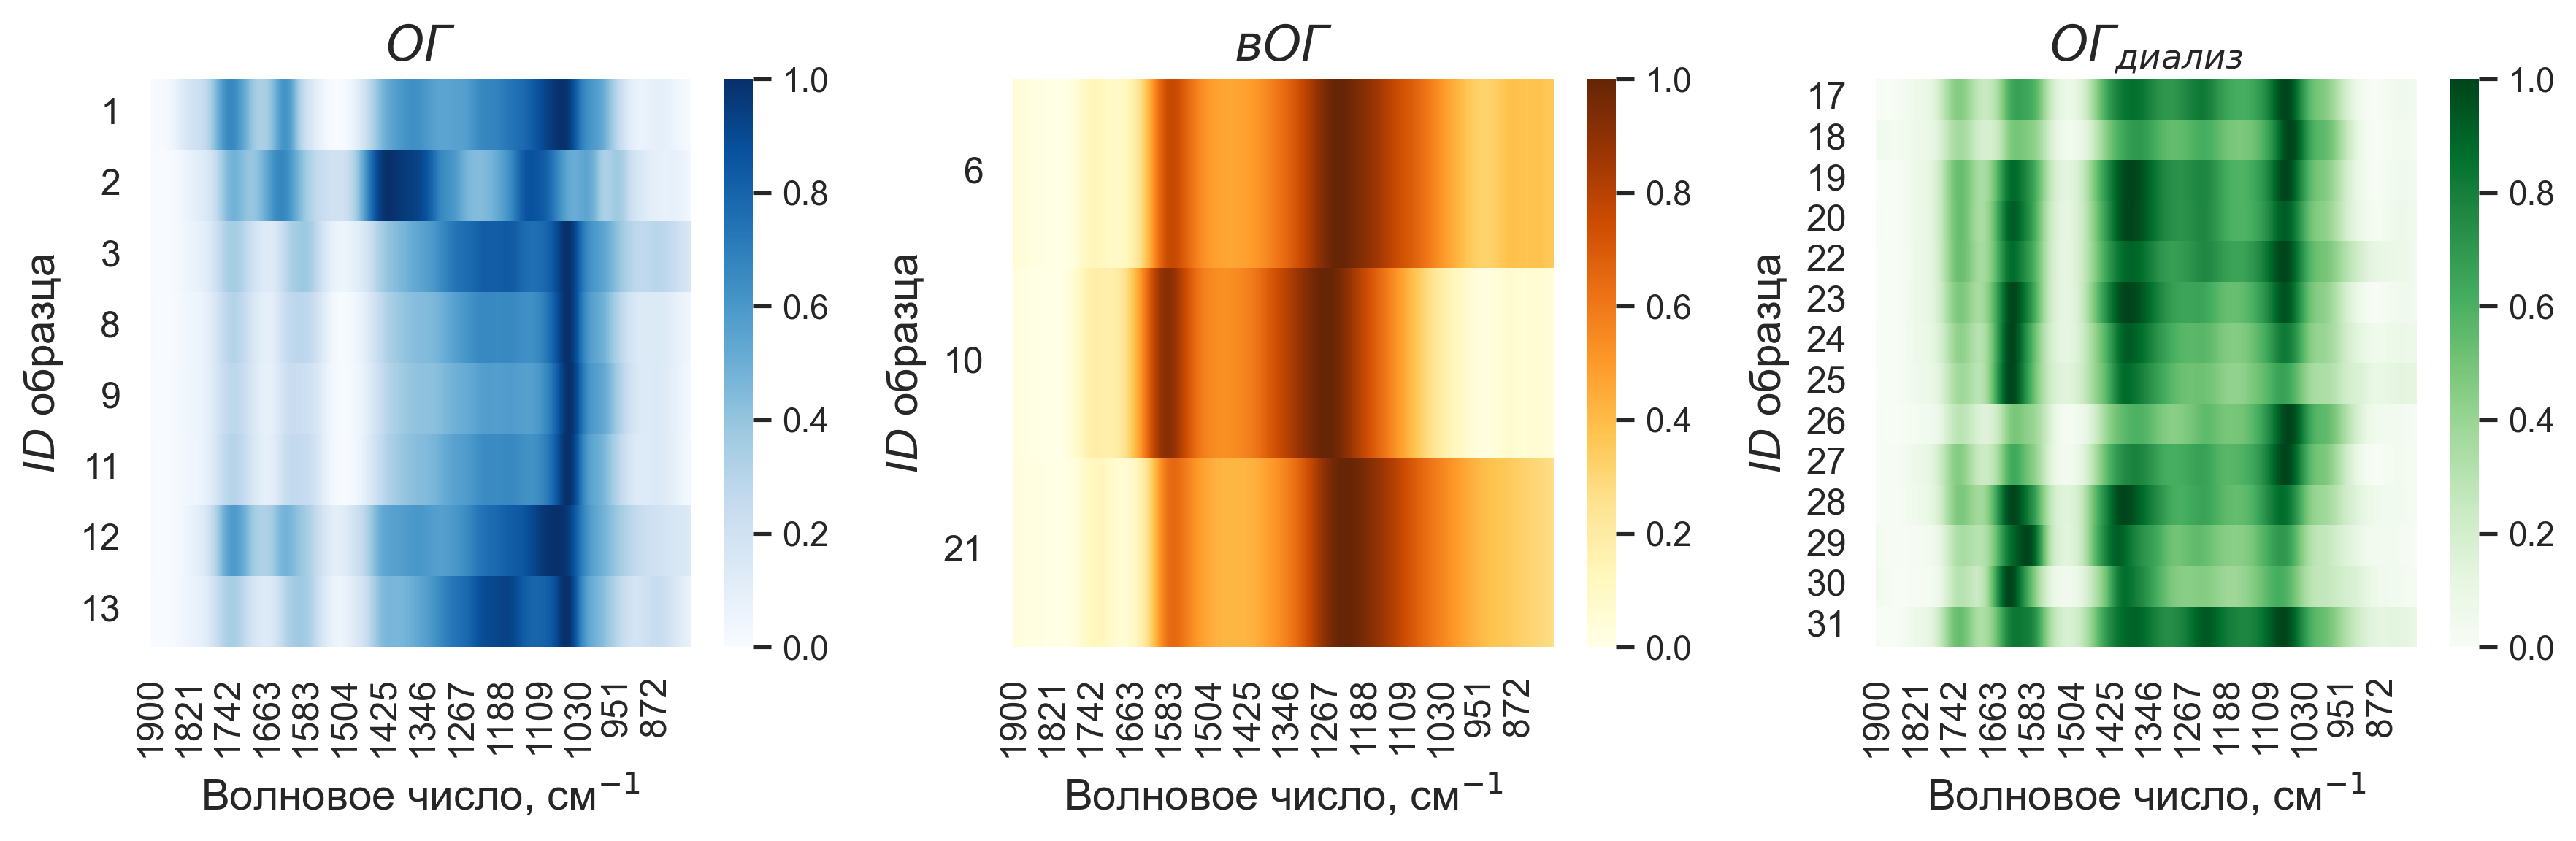

In [21]:
sns.set_theme()

nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4), dpi=300)

for ax, (type, cmap) in zip(axes, zip(unique_types, [type_cmap[t] for t in unique_types])):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = heatmap_data.loc[type_indexes]

    sns.heatmap(
        data=temp_data,
        cmap=cmap,
        ax=ax
    )

    ax.set_title(type_dict[type], fontstyle='normal', fontsize=fontsize+2, fontweight='bold')

    ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
    ax.set_ylabel('$ID$ образца', fontstyle='normal', fontsize=fontsize, rotation=90, labelpad=5)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2, rotation=0)

plt.tight_layout()

plt.savefig(f'{path_to_save}/heatmap_subplots_by_type.png', dpi=600)

plt.show()

## Analysis of spectra reproducibility

In [22]:
reproducibility_data = heatmap_data.copy()

print(reproducibility_data.shape)
reproducibility_data.head(3)

(25, 1141)


1900      1899      1898      1897      1896      1895      1894  \
1  0.000944  0.001362  0.001750  0.002112  0.002451  0.002770  0.003074   
2  0.000215  0.000213  0.000205  0.000192  0.000175  0.000155  0.000132   
3  0.002476  0.002405  0.002323  0.002230  0.002128  0.002017  0.001899   

       1893      1892      1891      1890      1889      1888      1887  \
1  0.003364  0.003646  0.003921  0.004193  0.004467  0.004744  0.005028   
2  0.000109  0.000085  0.000063  0.000042  0.000025  0.000011  0.000003   
3  0.001776  0.001648  0.001517  0.001383  0.001250  0.001116  0.000985   

       1886      1885      1884      1883      1882      1881      1881  \
1  0.005324  0.005633  0.005960  0.006308  0.006680  0.007079  0.007509   
2  0.000000  0.000004  0.000017  0.000039  0.000070  0.000113  0.000168   
3  0.000856  0.000732  0.000613  0.000501  0.000397  0.000303  0.000218   

       1880      1879      1878      1877  ...      824       823       822   \
1  0.007974  0.008476  0.009019  0.009606  ...  0.037121  0.035323  0.033560   
2  0.000236  0.000318  0.000415  0.000529  ...  0.072690  0.071565  0.070364   
3  0.000146  0.000087  0.000042  0.000013  ...  0.208237  0.205610  0.203011   

       821       820       819       818       817       816       815   \
1  0.031835  0.030152  0.028514  0.026926  0.025390  0.023910  0.022491   
2  0.069083  0.067721  0.066275  0.064743  0.063123  0.061413  0.059610   
3  0.200442  0.197910  0.195416  0.192967  0.190564  0.188213  0.185918   

       814       813       812       811       810       809       808   \
1  0.021135  0.019846  0.018627  0.017483  0.016417  0.015433  0.014533   
2  0.057713  0.055719  0.053626  0.051432  0.049135  0.046732  0.044221   
3  0.183681  0.181509  0.179403  0.177369  0.175410  0.173531  0.171735   

       807       806       805       804       803       802       801   \
1  0.013723  0.013004  0.012382  0.011859  0.011440  0.011127  0.010924   
2  0.041600  0.038868  0.036021  0.033058  0.029976  0.026773  0.023447   
3  0.170026  0.168408  0.166886  0.165463  0.164143  0.162931  0.161829   

       800   
1  0.010836  
2  0.019997  
3  0.160843  

[3 rows x 1141 columns]

### *Mean* spectra plots with confidence intervals

In [23]:
fontsize = 16
fontstyle='normal'

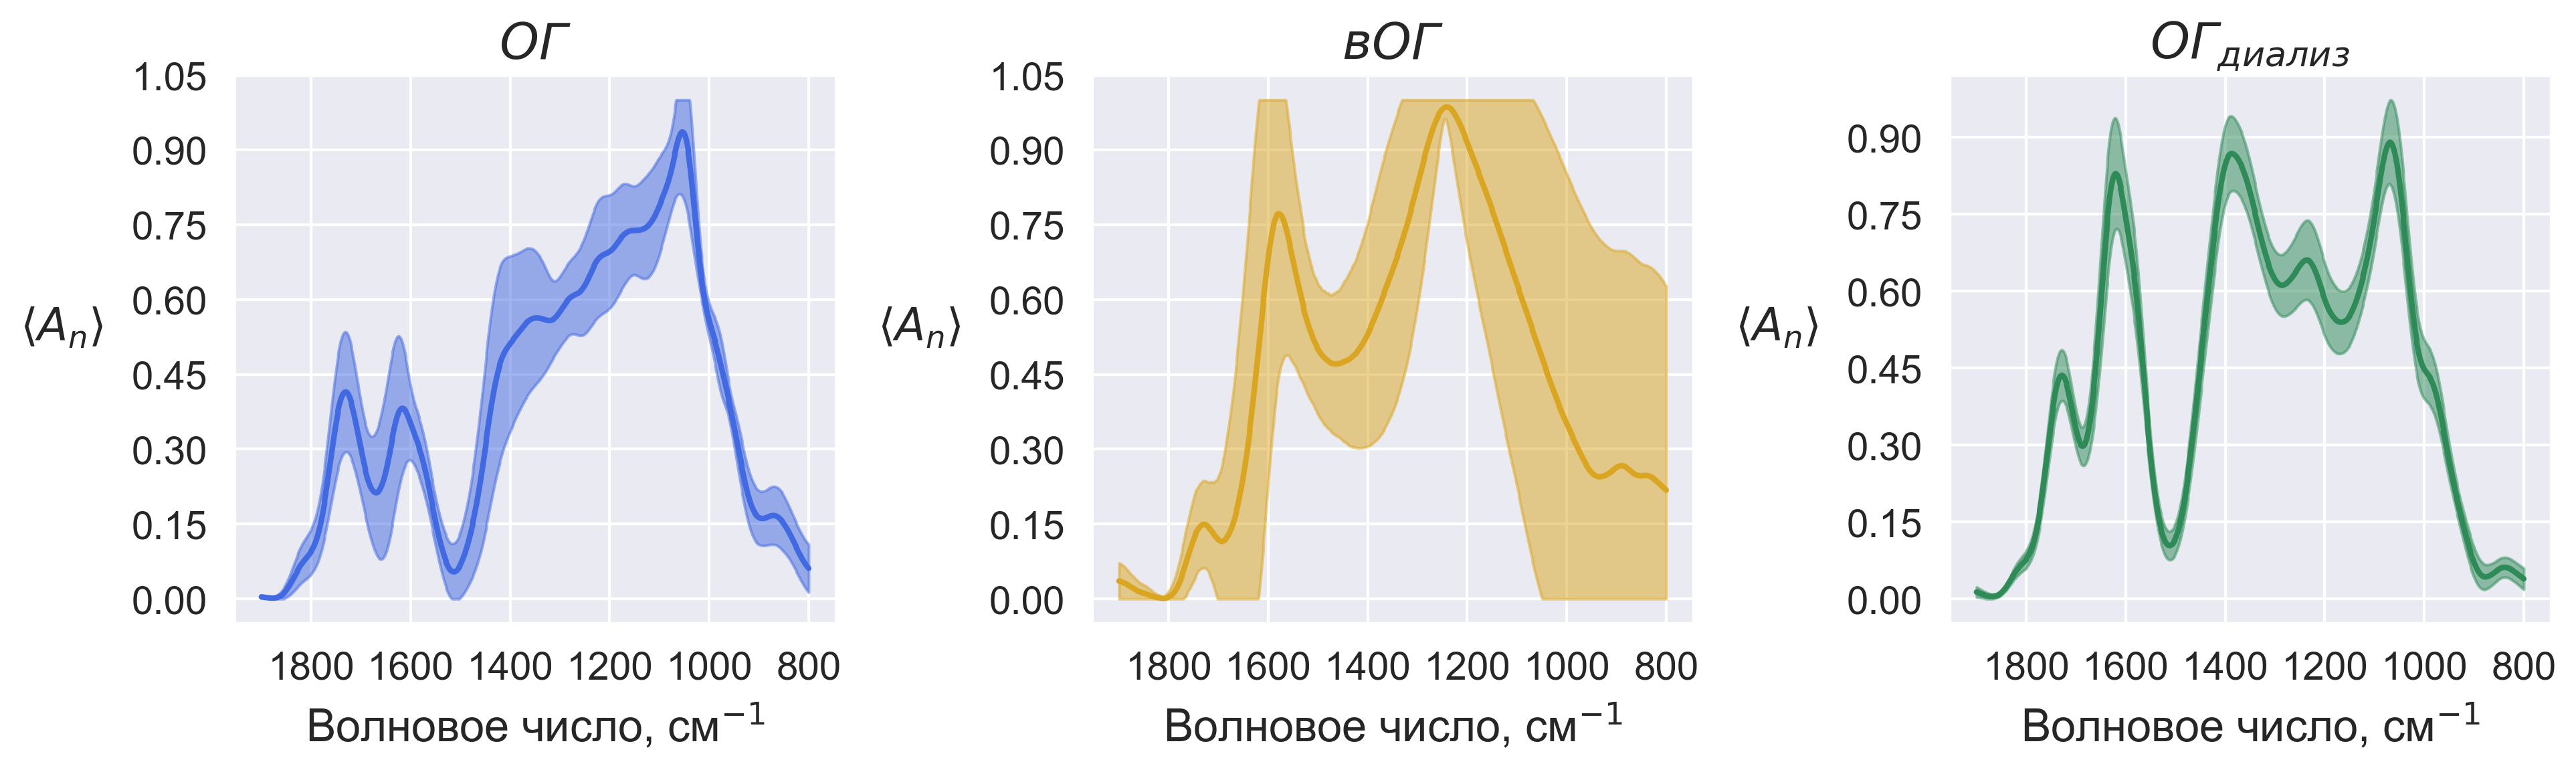

In [24]:
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 4), dpi=300)

for ax, type in zip(axes, unique_types):
    idx_lst = samples_description.loc[samples_description['Type'] == type].index
    tmp_data_vis = reproducibility_data.loc[idx_lst]

    mean_spectrum = tmp_data_vis.mean(axis=0)
    std_spectrum = tmp_data_vis.std(axis=0)
    n = tmp_data_vis.shape[0]

    sem = std_spectrum / np.sqrt(n)
    confidence = 0.95
    t_value = t.ppf((1 + confidence) / 2, df=n - 1)

    margin = t_value * sem
    lower_bound = np.clip(mean_spectrum - margin, 0, 1)
    upper_bound = np.clip(mean_spectrum + margin, 0, 1)

    ax.plot(
        tmp_data_vis.columns,
        mean_spectrum,
        linewidth=2.0,
        color=type_color_dict[type],
    )

    ax.fill_between(
        tmp_data_vis.columns,
        lower_bound,
        upper_bound,
        alpha=0.5,
        color=type_color_dict[type],
    )

    ax.set_title(type_dict[type], fontsize=fontsize+2, fontstyle='italic')
    
    ax.set_xlabel('Волновое число, см$^{-1}$', fontsize=fontsize, labelpad=5)
    ax.set_ylabel(r'$\langle A_{n} \rangle$', fontsize=fontsize, labelpad=25, rotation=0)

    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

    ax.tick_params(axis='x', labelsize=fontsize-2)
    ax.tick_params(axis='y', labelsize=fontsize-2)

    ax.invert_xaxis()

plt.tight_layout()

plt.savefig(f'{path_to_save}/mean_spectrum_ci_3_subplots.png', dpi=600)

plt.show()

### Visualization of *RSD* dependencies (3 subplots)

In [25]:
fontsize = 16
fontstyle='normal'

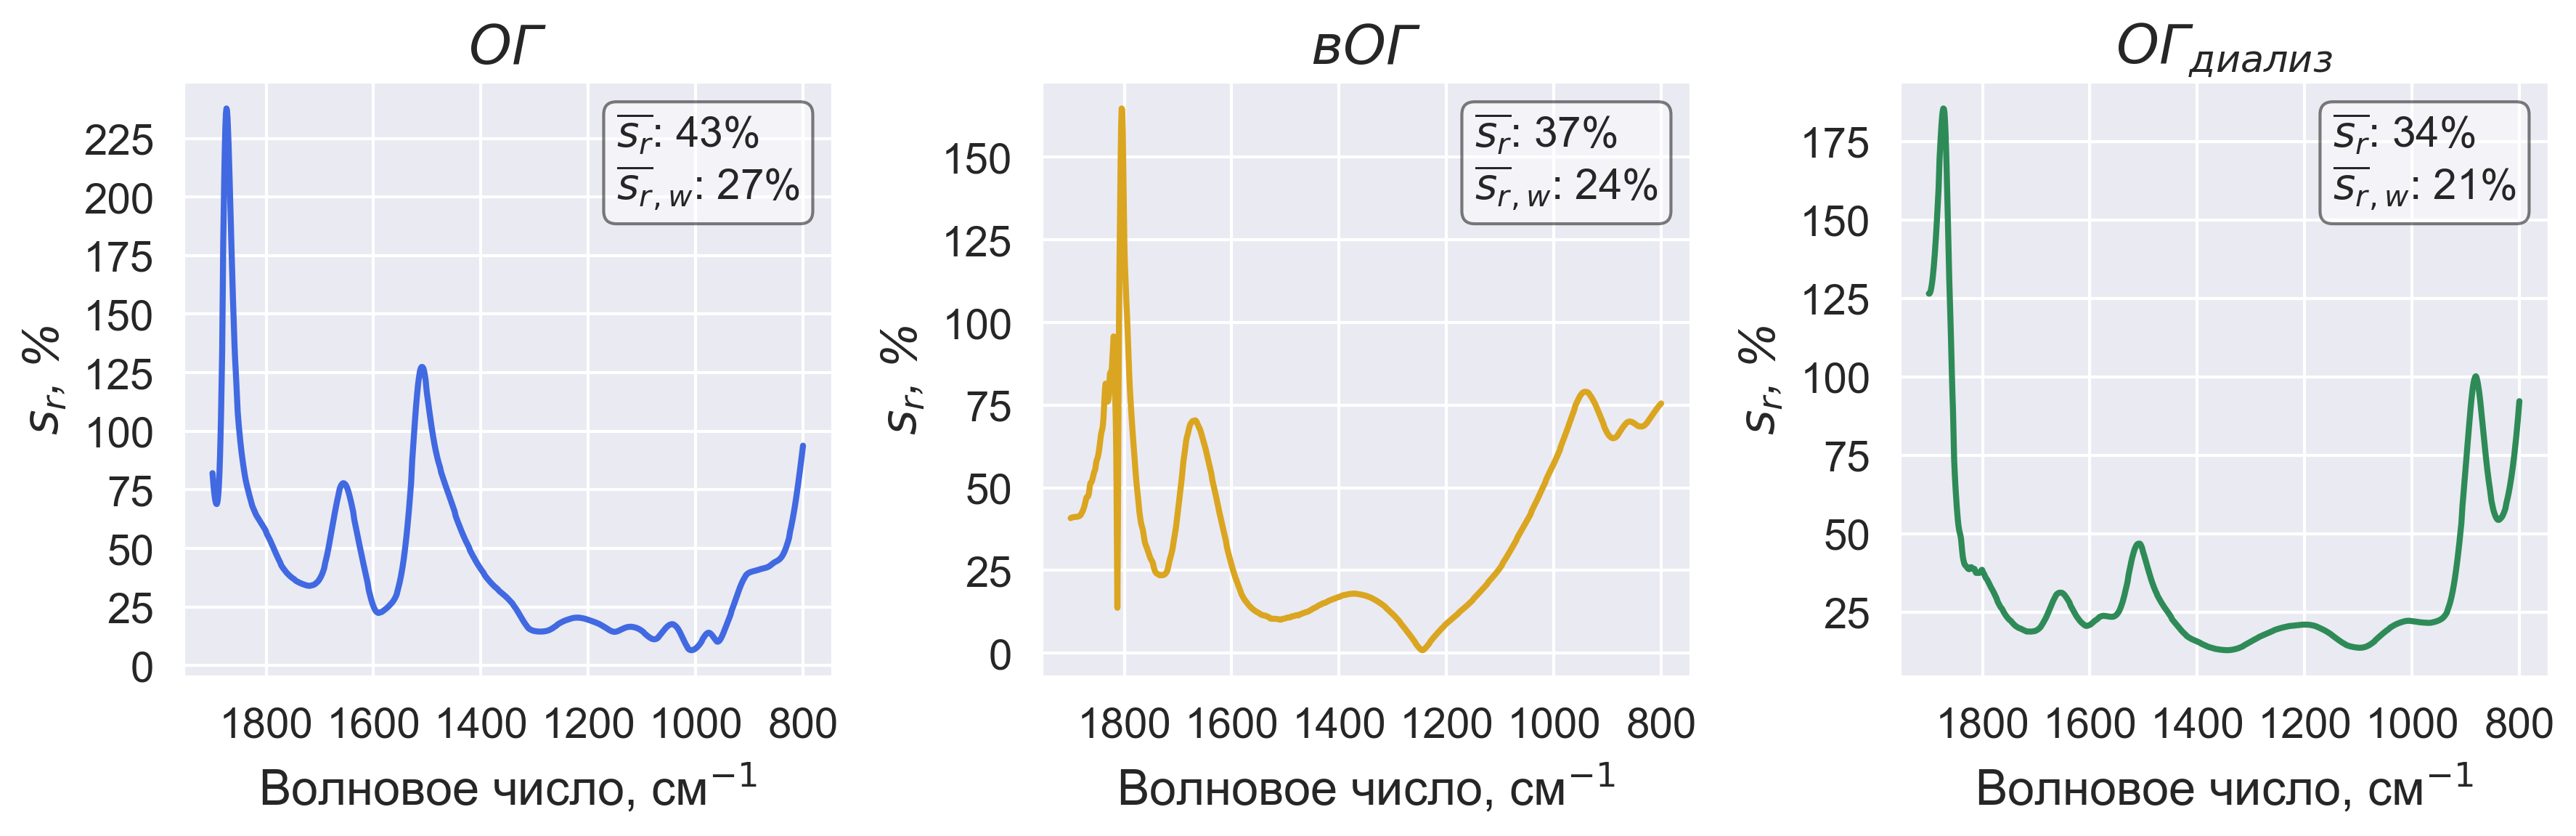

In [26]:
sns.set_theme()

nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4), dpi=300)

for ax, type in zip(axes, unique_types):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = reproducibility_data.loc[type_indexes]

    mean_vals = temp_data.mean()
    std_vals = temp_data.std()
    RSD = (std_vals / mean_vals) * 100

    mean_RSD = np.mean(RSD)
    weights = mean_vals / mean_vals.sum()
    mean_wRSD = np.sum(weights * RSD) / np.sum(weights)

    legend_text = (
        r"$\overline{s_{r}}$: " + f"{mean_RSD:.0f}%" + "\n" +
        r"$\overline{s_{r}}_{, w}$: " + f"{mean_wRSD:.0f}%"
    )    

    repr_df = pd.DataFrame({'RSD': RSD})

    sns.lineplot(
        data=repr_df,
        x=repr_df.index,
        y='RSD',
        color=type_color_dict[type],
        linewidth=2.0,
        ax=ax,
    )

    ax.set_title(type_dict[type], fontstyle='normal', fontsize=fontsize+2, fontweight='bold')
    
    ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
    ax.set_ylabel('$s_{r}$, %', fontstyle='italic', fontsize=fontsize, labelpad=5, rotation=90)

    ax.text(
        0.95, 0.95,
        legend_text,
        transform=ax.transAxes,
        fontsize=14,
        verticalalignment='top',
        horizontalalignment='right',
        multialignment='left',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle="round,pad=0.3")
    )
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2)

    ax.invert_xaxis()

plt.tight_layout()

plt.savefig(f'{path_to_save}/rsd_dependence_3_subplots.png', dpi=600)

plt.show()

### Visualization of *RSD* dependence (one plot)

In [27]:
fontsize = 16
fontstyle='normal'

y_scale = 'linear'  # linear, log

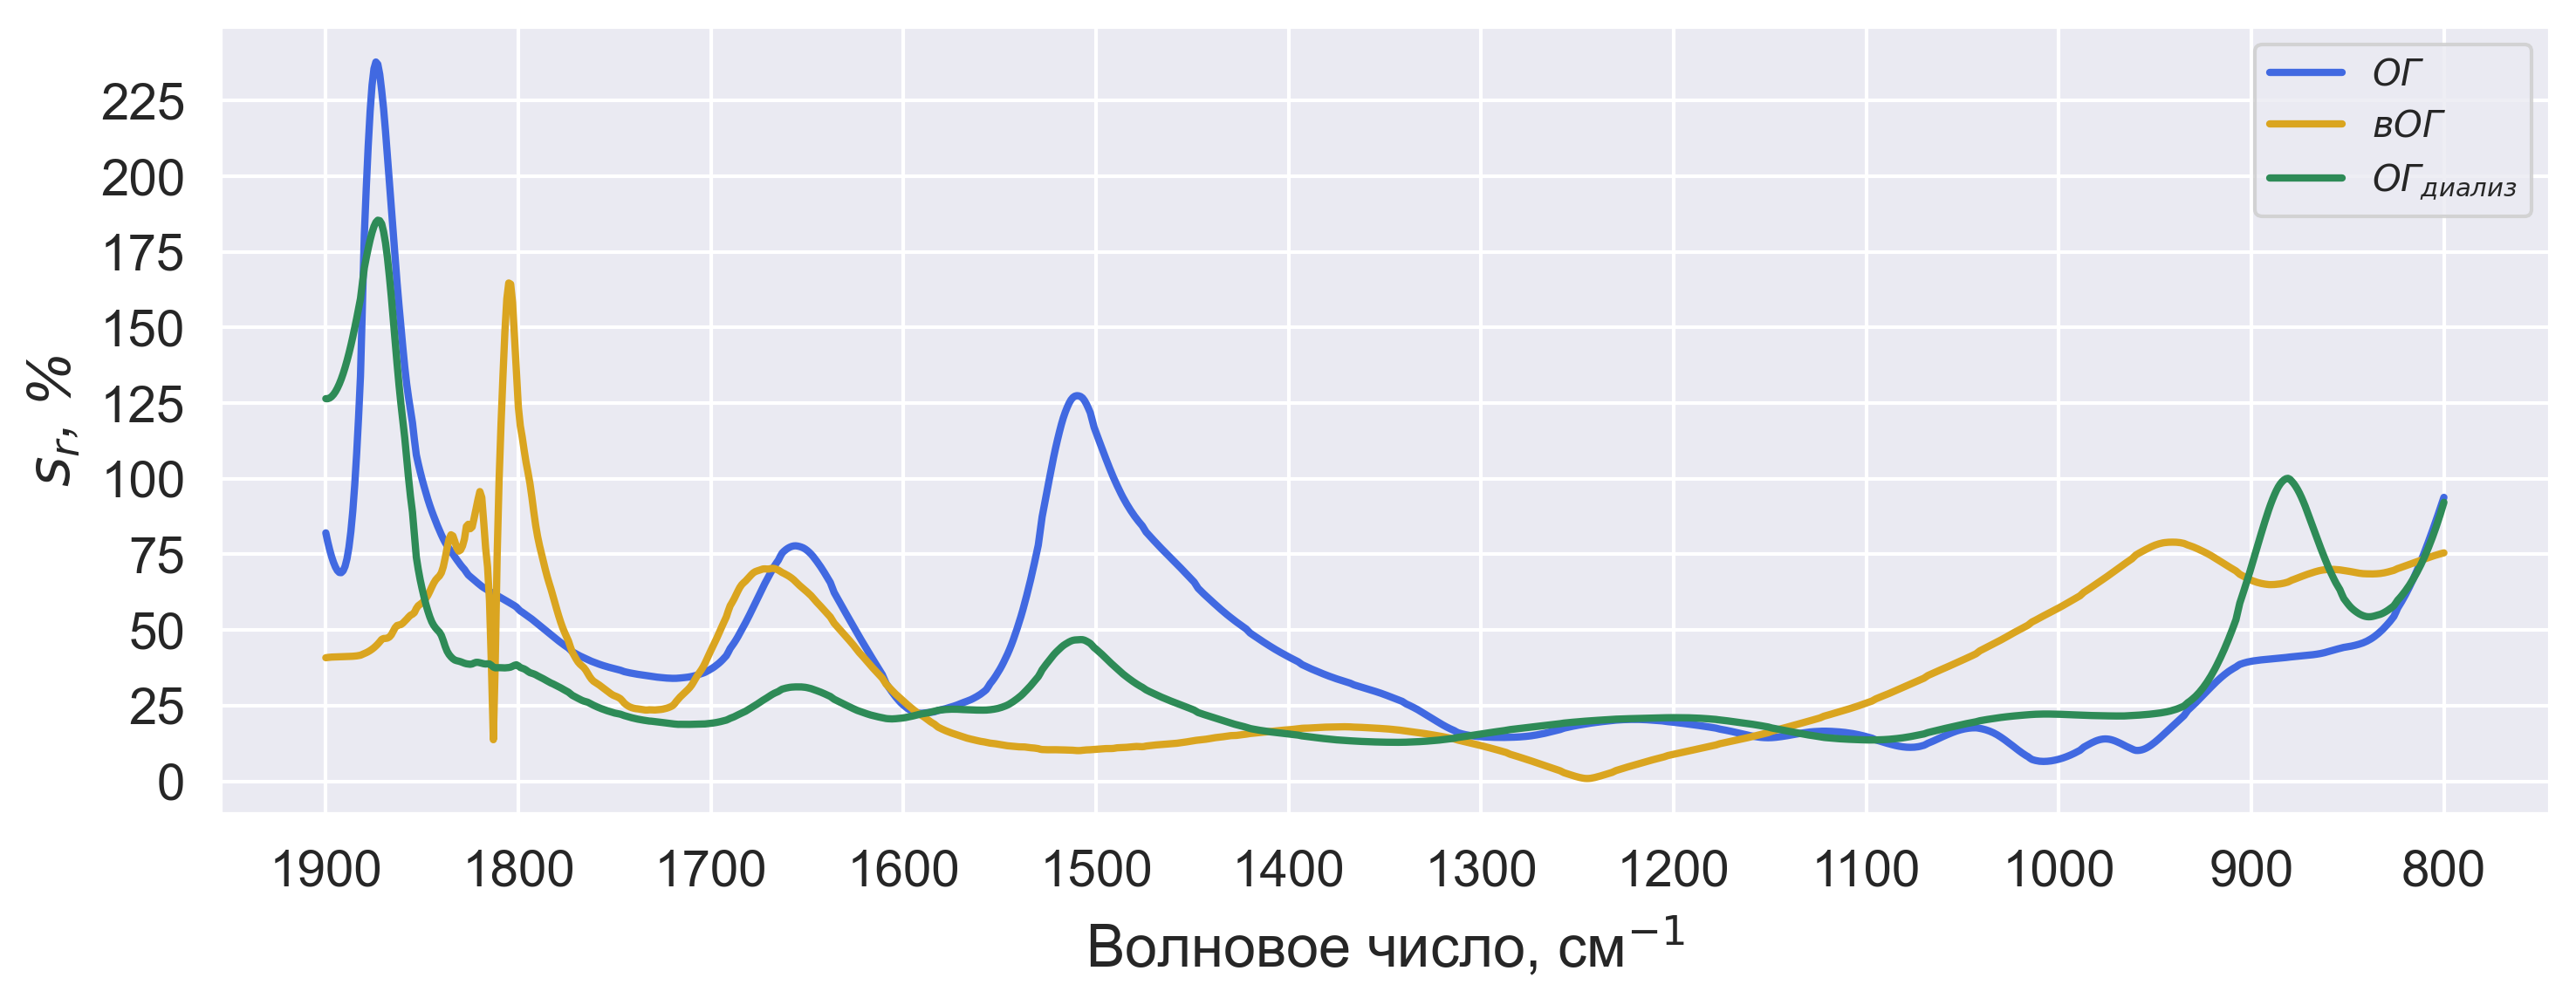

In [28]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

for type in unique_types:
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = reproducibility_data.loc[type_indexes]

    repr_df = pd.DataFrame(
        round(temp_data.std() / temp_data.mean() * 100, 2),
        columns=['rsd']
    )

    sns.lineplot(
        data=repr_df,
        x=repr_df.index,
        y='rsd',
        color=type_color_dict[type],
        linewidth=2.0,
        label=type_dict[type],
        ax=ax
    )

ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
ax.set_ylabel('$s_{r}$, %', fontstyle='italic', fontsize=fontsize, labelpad=5, rotation=90)

ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

ax.set_yscale(y_scale)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize-2)

ax.legend(fontsize=10)

plt.tight_layout()

plt.savefig(f'{path_to_save}/rsd_dependence_1_plot.png', dpi=600)

plt.show()